In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df


In [4]:
#Grab Data from Website 
web_page = requests.get('https://www.worldometers.info/coronavirus/')
soup = BeautifulSoup(web_page.text, 'html.parser')
#print(soup.prettify())

In [5]:
#GET specific data from the website
covid_data = soup.find_all('div', class_='maincounter-number')
print("Coronavirus Cases: ", covid_data[0].text.strip())
print("Deaths: ", covid_data[1].text.strip())
print("Recovered: ", covid_data[2].text.strip())

data = soup.find_all("script", {"type": "text/javascript"})
#for content in data:
    #print(content)


Coronavirus Cases:  513,112,184
Deaths:  6,260,033
Recovered:  466,953,490


In [6]:
result = soup.find(id = 'main_table_countries_today')
content = result.find_all('td')
#content

In [7]:

# sourcery skip: use-fstring-for-concatenation
clean_data = " "
for data in content:
    clean_data += data.text.strip() + "|"
    clean_data = clean_data.replace("+", "")
    clean_data = clean_data.replace("N/A", "0")
#clean_data

In [ ]:
import re

# Got a list of countries from the website
countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]
#find country followed by a comma, |, or space
for c in countries:
    pattern = c + "[,|\d]*"
    data = re.search(pattern, clean_data, re.IGNORECASE)
    if data is not None: #if country data is found
        print(data.group())

In [ ]:
owid_df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')
owid_df.columns

country_df = owid_df.location.unique()

indexer = owid_df[owid_df['location']=='United States'].index #index of United States (location where usa data is located)
us_tc = owid_df.loc[indexer, 'date':'total_cases'] #total cases for United States per date
us_tc = us_tc.dropna() #drop any blank values
us_tc.set_index('date', inplace=True) #set date as index
us_tc.plot(figsize=(12,6)) #plot total cases for United States
us_tc.rolling(window=30).mean()['total_cases'].plot() #rolling average of total cases for United States (checking the average and if we are going under that average things are getting better else things are getting worse)




Do Lockdowns Work?

In [87]:
def plot_covid_data(country, col, plot_ma=False, y_max=10000):
    # Get indexes for location rows equal to country name
    indexer = owid_df[owid_df['location']==country].index
    # Get dataframe location and column data for country name
    country_df = owid_df.loc[indexer, 'date':col]
    # Delete NaN values
    country_df = country_df.dropna()
    # Set date as index
    country_df.set_index('date', inplace=True)
    # Remove all columns except for what I want
    country_df.drop(country_df.columns.difference([col]), 1, inplace=True) #drop all columns except for col
    fig = px.line(country_df, x=country_df.index, y=col, title=country)
    #fig.show()
    # Plot moving average if requested
    if plot_ma:
        # Plot a 30 day moving average
        country_df.rolling(window=30).mean()[col]
        fig.add_scatter(x=country_df.index, y=country_df.rolling(window=30).mean()[col], mode = 'lines') #plot moving average
        labels={
            "country_df.index": "Date",
            "country_df.rolling(window=30).mean()[col]": "Moving Average"
        }
        fig['data'][0]['line']['color']='rgb(235, 160, 95)' # Set line color to red
        fig['data'][0]['line']['width']= 1 #set line width
        fig.show()
    #print(country_df.columns)
    
# Least restrictive lockdown
plot_covid_data('Sweden', 'new_cases_per_million', True)
# Most restrictive lockdown measures
plot_covid_data('Bolivia', 'new_cases_per_million', True) 

C:\Users\bello\AppData\Local\Temp/ipykernel_12692/2698091410.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



How Does Median Age Affect Death Rate?

In [88]:
#Lowest Median Age
plot_covid_data('Serbia', 'new_deaths_per_million', True, y_max=10)
# Highest Median Age
plot_covid_data('Japan', 'new_deaths_per_million', True, y_max=10) 

C:\Users\bello\AppData\Local\Temp/ipykernel_12692/2698091410.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



How does Obesity Affect Death rate? (2 countries with high obesity rate Canada and United States and India and Japan  )

C:\Users\bello\AppData\Local\Temp/ipykernel_12692/880965052.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Index(['new_deaths_per_million'], dtype='object')


C:\Users\bello\AppData\Local\Temp/ipykernel_12692/880965052.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Index(['new_deaths_per_million'], dtype='object')


C:\Users\bello\AppData\Local\Temp/ipykernel_12692/880965052.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Index(['new_deaths_per_million'], dtype='object')


C:\Users\bello\AppData\Local\Temp/ipykernel_12692/880965052.py:11: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



Index(['new_deaths_per_million'], dtype='object')


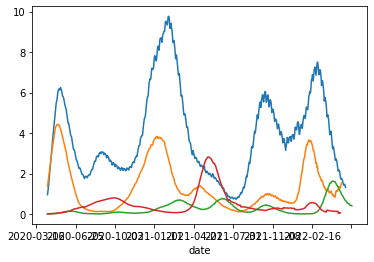

In [56]:
plot_covid_data('United States', 'new_deaths_per_million', True, y_max=10)
plot_covid_data('Canada', 'new_deaths_per_million', True, y_max=10)
plot_covid_data('Japan', 'new_deaths_per_million', True, y_max=10)
plot_covid_data('India', 'new_deaths_per_million', True, y_max=10)